In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
test = pd.read_csv(r"../app/entites/fakenews_dataset/dataset.tsv", sep="\t")

In [40]:
test

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1
...,...,...
5753,Эдди Чемберс получил сотрясение мозга в бою с ...,0
5754,Правительство застроит Россию нефтепродуктопро...,0
5755,«Мне стыдно перед дедом»: новый канцлер ФРГ об...,1
5756,Туркмения в декабре начнет поставки газа в Китай,0


In [41]:
y = test["is_fake"]
X = test["title"]

In [57]:
from spacy.lang.ru.stop_words import STOP_WORDS
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tfidf = TfidfVectorizer(stop_words=list(STOP_WORDS), ngram_range=(1, 2))

X_train_transform = tfidf.fit_transform(X_train)

model = MultinomialNB()
model.fit(X_train_transform, y_train)

MultinomialNB()

In [58]:
X_test_transform = tfidf.transform(X_test)

In [59]:
y_pred = model.predict(X_test_transform)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [61]:
accuracy_score(y_test, y_pred)

0.8216728037874803

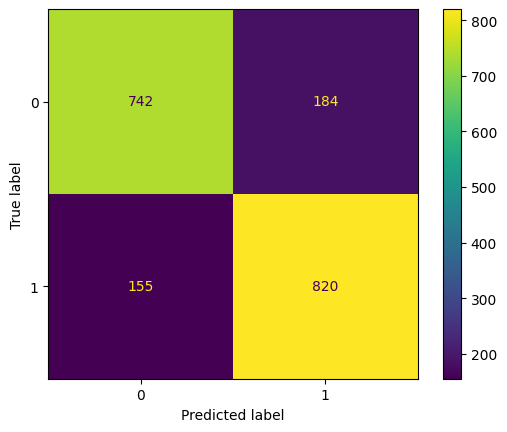

In [62]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.savefig("test_results.png")